# Decision Tree with Python

** Importing needed packages **

In [1]:
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = plt.rcParams['axes.color_cycle'][1], plt.rcParams['axes.color_cycle'][4]

import pandas

** Loading data, generated locally for example 'John plays tennis?' **

In [2]:
dataset = pandas.read_csv("tennis.csv")

In [3]:
dataset

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,hot,high,strong,no
1,overcast,hot,high,weak,yes
2,sunny,hot,high,weak,no
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


** Transforming categorical attributes **

In [4]:
categorical_cols = ['Outlook', 'Temperature', 'Humidity', 'Wind']
for column in categorical_cols:
    dataset[column] = pandas.factorize(dataset[column])[0]
dataset

,Outlook,Temperature,Humidity,Wind,Play
0,0,0,0,0,no
1,1,0,0,1,yes
2,0,0,0,1,no
3,2,1,0,1,yes
4,2,2,1,1,yes
5,2,2,1,0,no
6,1,2,1,0,yes
7,0,1,0,1,no
8,0,2,1,1,yes
9,2,1,1,1,yes


** Transforming binary target: **
- If target is equal to ** 'yes' **, then it will be transformed to ** + 1 **
- If target is equal to ** 'no' **, then it will be transformed to ** - 1 **

In [5]:
dataset['Play'] = dataset['Play'].replace('yes', 1)
dataset['Play'] = dataset['Play'].replace('no', 0)
dataset

,Outlook,Temperature,Humidity,Wind,Play
0,0,0,0,0,0
1,1,0,0,1,1
2,0,0,0,1,0
3,2,1,0,1,1
4,2,2,1,1,1
5,2,2,1,0,0
6,1,2,1,0,1
7,0,1,0,1,0
8,0,2,1,1,1
9,2,1,1,1,1


** Train / Test set split: Dividing sub-set of test and training **

In [6]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(dataset, train_size = 0.7)

/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


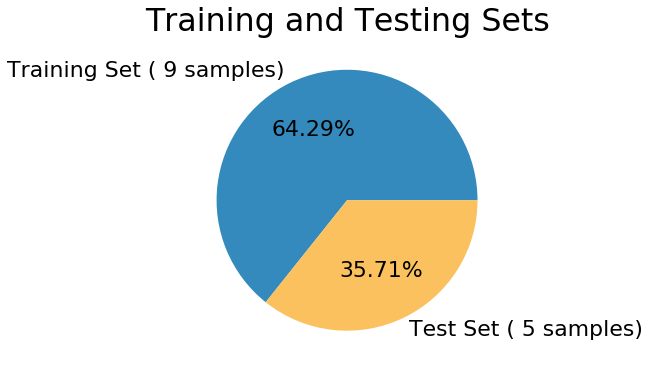

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
labels = ["Training Set (% d samples)" % len(train), "Test Set (% d samples)" % len(test)]
sizes = [len(train), len(test)]
plt.rcParams.update({'font.size': 22})
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title("Training and Testing Sets")
ax.set_aspect('equal')

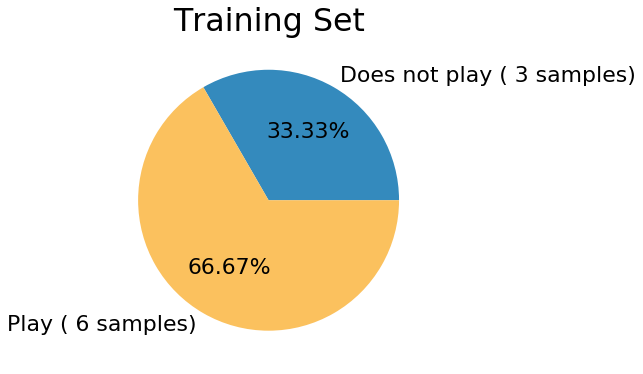

In [8]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
labels = ["Does not play (% d samples)" % len(train[train.Play < 0.5]), "Play (% d samples)" % len(train[train.Play > 0.5])]
sizes = [len(train[train.Play < 0.5]), len(train[train.Play > 0.5])]
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title("Training Set")
plt.rcParams.update({'font.size': 22})
ax.set_aspect('equal')

# Decision Tree Training (machine learning) Process#

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier(max_depth=3)
#dt = DecisionTreeClassifier()
decision_tree_binary_classifier = dt.fit(train[categorical_cols], train.Play)

** Display generated tree **

In [10]:
!pip install pydotplus

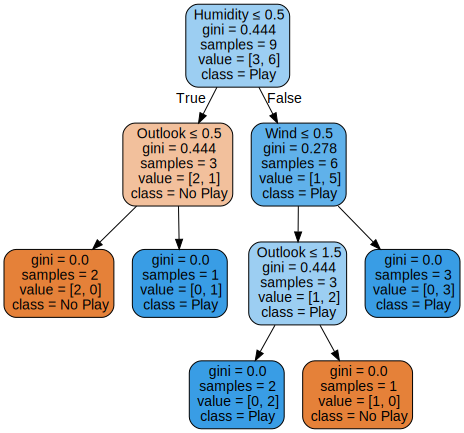

In [11]:
from IPython.display import SVG
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(
    decision_tree_binary_classifier,
    out_file=dot_data,  
    feature_names=np.array(categorical_cols),
    
#    class_names=['Play', 'No Play'], # Correction on 29 Jan 2018 
    class_names=['No Play', 'Play'], # Credit to: Tang Shi Yuan: No play is 0; Play is 1.
    
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
SVG(graph.create(format='svg'))

In [12]:
# print(train[categorical_cols])
# print(train.Play)

** Confusion Matrix **

Confusion matrix
[[1 1]
 [0 3]]


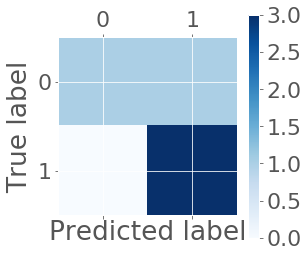

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
test_output = decision_tree_binary_classifier.predict(test[categorical_cols])
cm = confusion_matrix(test.Play, test_output)

print('Confusion matrix')
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(16, 16))
plt.matshow(cm, cmap=plt.get_cmap('Blues'))
# plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

** Classifier Performance **

In [14]:
report = classification_report(
    test.Play,
    test_output,
    target_names=["No Play", "Play"]
)
print(report)

             precision    recall  f1-score   support

    No Play       1.00      0.50      0.67         2
       Play       0.75      1.00      0.86         3

avg / total       0.85      0.80      0.78         5



---